# 📊 Transportation Network Analysis - Visualization Showcase
## Professional Data Visualizations for Portfolio

**Project:** Amazon Transportation Network Optimization  
**Analyst:** Samiya Islam  
**Dataset:** DataCo Supply Chain (180,519 records)

This notebook creates publication-quality visualizations demonstrating data visualization skills for data analyst roles.

---

## Setup & Configuration

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import Rectangle
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set professional style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_context("notebook", font_scale=1.1)
sns.set_palette("Set2")

# Configure matplotlib
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 16

print("✅ Libraries loaded successfully")
print(f"📅 Visualization Date: {datetime.now().strftime('%Y-%m-%d')}")

✅ Libraries loaded successfully
📅 Visualization Date: 2025-12-24


In [4]:
# Load dataset
# NOTE: Download from https://www.kaggle.com/datasets/shashwatwork/dataco-smart-supply-chain-for-big-data-analysis

try:
    df = pd.read_csv('data/DataCoSupplyChainDataset.csv', encoding='latin-1')
    print(f"✅ Dataset loaded: {len(df):,} records, {len(df.columns)} columns")
    
    # Quick data prep
    df = df.drop_duplicates()
    
    # Create calculated fields
    if 'Days for shipping (real)' in df.columns and 'Days for shipment (scheduled)' in df.columns:
        df['Delivery_Variance_Days'] = df['Days for shipping (real)'] - df['Days for shipment (scheduled)']
        df['On_Time_Flag'] = (df['Delivery_Variance_Days'] <= 0).astype(int)
    
    print(f"✅ Data preprocessed: {len(df):,} unique records")
    
except FileNotFoundError:
    print("❌ Dataset not found!")
    print("📥 Download from: https://www.kaggle.com/datasets/shashwatwork/dataco-smart-supply-chain-for-big-data-analysis")
    print("📁 Place 'DataCoSupplyChainDataset.csv' in the same directory as this notebook")

✅ Dataset loaded: 180,519 records, 53 columns
✅ Data preprocessed: 180,519 unique records


In [13]:
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,Delivery_Variance_Days,On_Time_Flag
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class,-1,1
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class,1,0
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class,0,1
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class,-1,1
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class,-2,1


In [14]:
df2= pd.read_csv('data/tokenized_access_logs.csv', encoding='latin-1')
df2.head()

,Product,Category,Date,Month,Hour,Department,ip,url
0,adidas Brazuca 2017 Official Match Ball,baseball & softball,9/1/2017 6:00,Sep,6,fitness,37.97.182.65,/department/fitness/category/baseball%20&%20so...
1,The North Face Women's Recon Backpack,hunting & shooting,9/1/2017 6:00,Sep,6,fan shop,206.56.112.1,/department/fan%20shop/category/hunting%20&%20...
2,adidas Kids' RG III Mid Football Cleat,featured shops,9/1/2017 6:00,Sep,6,apparel,215.143.180.0,/department/apparel/category/featured%20shops/...
3,Under Armour Men's Compression EV SL Slide,electronics,9/1/2017 6:00,Sep,6,footwear,206.56.112.1,/department/footwear/category/electronics/prod...
4,Pelican Sunstream 100 Kayak,water sports,9/1/2017 6:01,Sep,6,fan shop,136.108.56.242,/department/fan%20shop/category/water%20sports...


---
## 📊 Visualization 1: Executive Dashboard - Key Metrics Overview

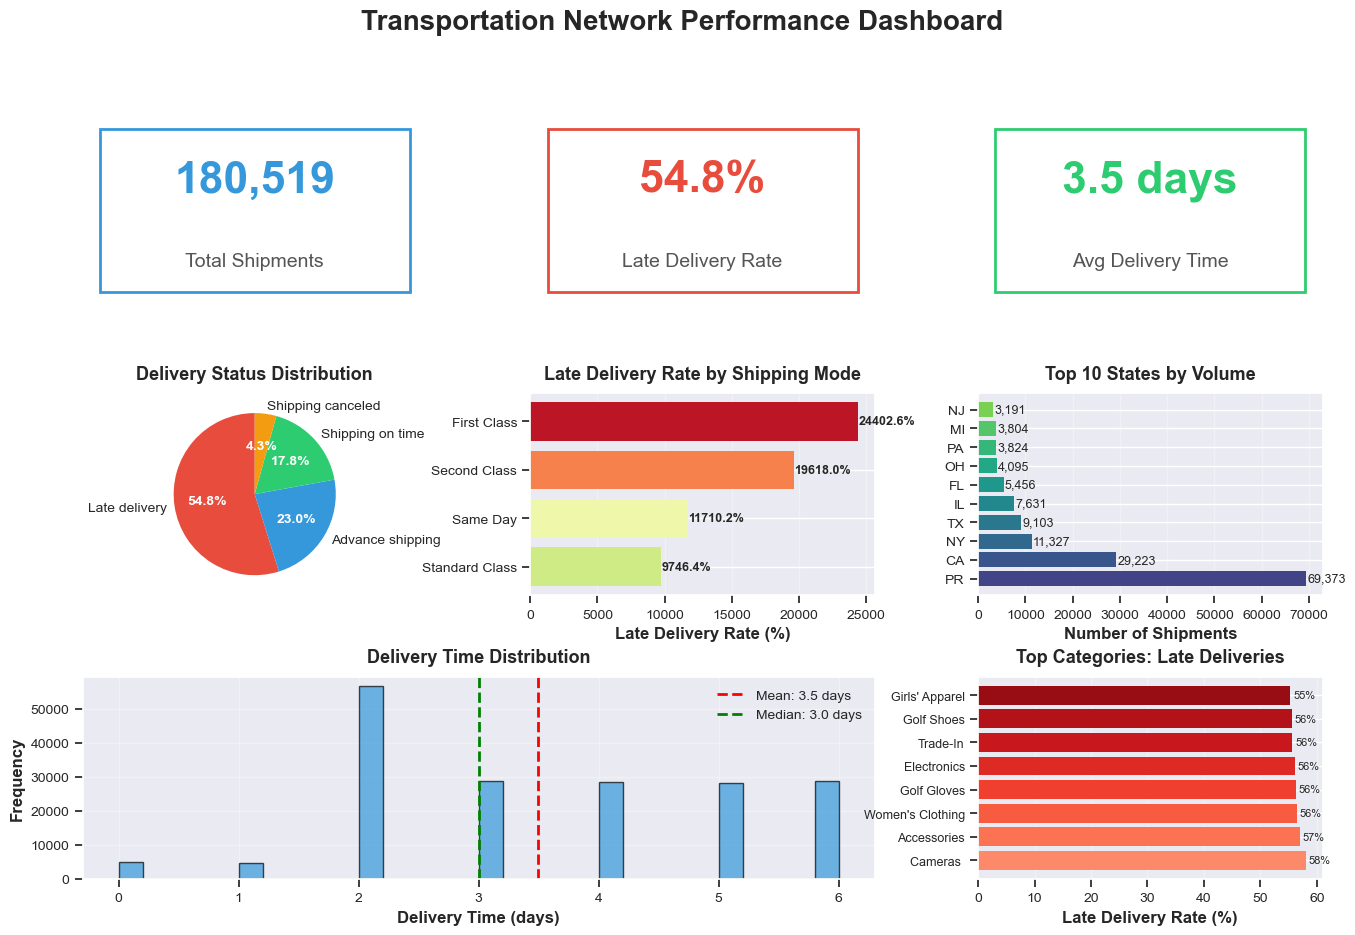


✅ Visualization 1 saved: viz_1_executive_dashboard.png


In [5]:
# Calculate key metrics
total_shipments = len(df)
late_deliveries = df['Late_delivery_risk'].sum()
on_time_rate = ((total_shipments - late_deliveries) / total_shipments) * 100
late_rate = (late_deliveries / total_shipments) * 100
avg_delivery_days = df['Days for shipping (real)'].mean()
total_revenue = df['Sales'].sum() if 'Sales' in df.columns else 0

# Create dashboard
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(3, 3, hspace=0.4, wspace=0.3)

# Main title
fig.suptitle('Transportation Network Performance Dashboard', 
             fontsize=20, fontweight='bold', y=0.98)

# --- KPI Cards (Top Row) ---
kpi_data = [
    {'title': 'Total Shipments', 'value': f'{total_shipments:,}', 'color': '#3498db'},
    {'title': 'Late Delivery Rate', 'value': f'{late_rate:.1f}%', 'color': '#e74c3c'},
    {'title': 'Avg Delivery Time', 'value': f'{avg_delivery_days:.1f} days', 'color': '#2ecc71'}
]

for i, kpi in enumerate(kpi_data):
    ax = fig.add_subplot(gs[0, i])
    ax.text(0.5, 0.65, kpi['value'], ha='center', va='center', 
            fontsize=32, fontweight='bold', color=kpi['color'])
    ax.text(0.5, 0.25, kpi['title'], ha='center', va='center', 
            fontsize=14, color='#555555')
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.axis('off')
    
    # Add border
    rect = Rectangle((0.05, 0.1), 0.9, 0.8, linewidth=2, 
                     edgecolor=kpi['color'], facecolor='none')
    ax.add_patch(rect)

# --- Delivery Status Distribution (Middle Left) ---
ax1 = fig.add_subplot(gs[1, 0])
if 'Delivery Status' in df.columns:
    status_counts = df['Delivery Status'].value_counts().head(5)
    colors = ['#e74c3c', '#3498db', '#2ecc71', '#f39c12', '#9b59b6']
    wedges, texts, autotexts = ax1.pie(status_counts.values, labels=status_counts.index, 
                                         autopct='%1.1f%%', startangle=90, colors=colors)
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontsize(10)
        autotext.set_fontweight('bold')
ax1.set_title('Delivery Status Distribution', fontsize=13, fontweight='bold', pad=10)

# --- Shipping Mode Performance (Middle Center) ---
ax2 = fig.add_subplot(gs[1, 1])
if 'Shipping Mode' in df.columns:
    mode_late = df.groupby('Shipping Mode')['Late_delivery_risk'].agg(['mean', 'count'])
    mode_late = mode_late[mode_late['count'] >= 100].sort_values('mean', ascending=True)
    
    colors_bar = plt.cm.RdYlGn_r(mode_late['mean'])
    bars = ax2.barh(range(len(mode_late)), mode_late['mean'] * 100, color=colors_bar)
    ax2.set_yticks(range(len(mode_late)))
    ax2.set_yticklabels(mode_late.index)
    ax2.set_xlabel('Late Delivery Rate (%)', fontweight='bold')
    ax2.set_title('Late Delivery Rate by Shipping Mode', fontsize=13, fontweight='bold', pad=10)
    ax2.grid(axis='x', alpha=0.3)
    
    for i, v in enumerate(mode_late['mean'] * 100):
        ax2.text(v + 1, i, f'{v:.1f}%', va='center', fontsize=9, fontweight='bold')

# --- Top 10 States by Volume (Middle Right) ---
ax3 = fig.add_subplot(gs[1, 2])
if 'Customer State' in df.columns:
    top_states = df['Customer State'].value_counts().head(10)
    colors_states = plt.cm.viridis(np.linspace(0.2, 0.8, len(top_states)))
    bars = ax3.barh(range(len(top_states)), top_states.values, color=colors_states)
    ax3.set_yticks(range(len(top_states)))
    ax3.set_yticklabels(top_states.index)
    ax3.set_xlabel('Number of Shipments', fontweight='bold')
    ax3.set_title('Top 10 States by Volume', fontsize=13, fontweight='bold', pad=10)
    ax3.grid(axis='x', alpha=0.3)
    
    for i, v in enumerate(top_states.values):
        ax3.text(v + 200, i, f'{v:,}', va='center', fontsize=9)

# --- Delivery Time Distribution (Bottom Left & Center) ---
ax4 = fig.add_subplot(gs[2, :2])
if 'Days for shipping (real)' in df.columns:
    # Filter outliers for better visualization
    delivery_days = df['Days for shipping (real)'][df['Days for shipping (real)'] <= 10]
    
    ax4.hist(delivery_days, bins=30, color='#3498db', alpha=0.7, edgecolor='black')
    ax4.axvline(delivery_days.mean(), color='red', linestyle='--', linewidth=2, 
                label=f'Mean: {delivery_days.mean():.1f} days')
    ax4.axvline(delivery_days.median(), color='green', linestyle='--', linewidth=2, 
                label=f'Median: {delivery_days.median():.1f} days')
    ax4.set_xlabel('Delivery Time (days)', fontweight='bold')
    ax4.set_ylabel('Frequency', fontweight='bold')
    ax4.set_title('Delivery Time Distribution', fontsize=13, fontweight='bold', pad=10)
    ax4.legend()
    ax4.grid(alpha=0.3)

# --- Late Delivery by Category (Bottom Right) ---
ax5 = fig.add_subplot(gs[2, 2])
if 'Category Name' in df.columns:
    cat_late = df.groupby('Category Name')['Late_delivery_risk'].agg(['mean', 'count'])
    cat_late = cat_late[cat_late['count'] >= 500].sort_values('mean', ascending=False).head(8)
    
    colors_cat = plt.cm.Reds(np.linspace(0.4, 0.9, len(cat_late)))
    bars = ax5.barh(range(len(cat_late)), cat_late['mean'] * 100, color=colors_cat)
    ax5.set_yticks(range(len(cat_late)))
    ax5.set_yticklabels([label[:20] + '...' if len(label) > 20 else label 
                          for label in cat_late.index], fontsize=9)
    ax5.set_xlabel('Late Delivery Rate (%)', fontweight='bold')
    ax5.set_title('Top Categories: Late Deliveries', fontsize=13, fontweight='bold', pad=10)
    ax5.grid(axis='x', alpha=0.3)
    
    for i, v in enumerate(cat_late['mean'] * 100):
        ax5.text(v + 0.5, i, f'{v:.0f}%', va='center', fontsize=8)

plt.savefig('viz_1_executive_dashboard.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("\n✅ Visualization 1 saved: viz_1_executive_dashboard.png")

---
## 📊 Visualization 2: Shipping Mode Deep Dive Analysis

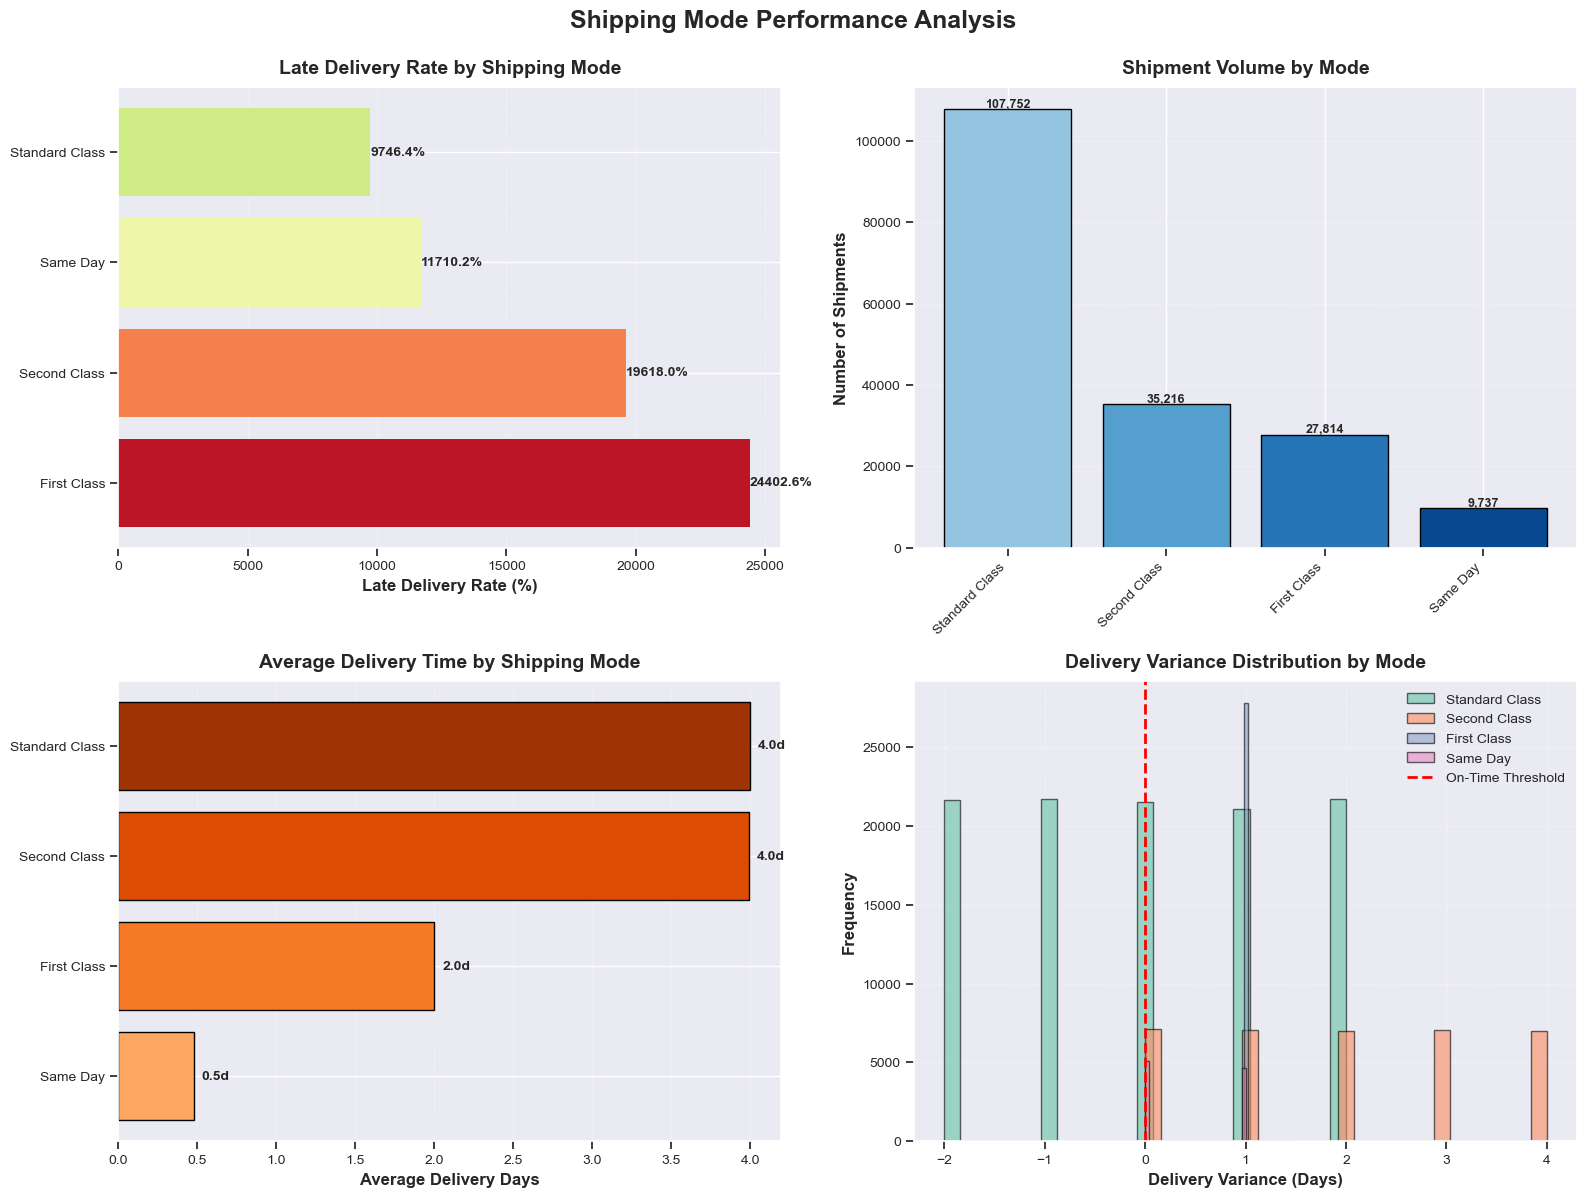


✅ Visualization 2 saved: viz_2_shipping_mode_analysis.png


In [6]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Shipping Mode Performance Analysis', fontsize=18, fontweight='bold', y=0.995)

# --- Chart 1: Late Delivery Rate by Mode ---
if 'Shipping Mode' in df.columns:
    mode_analysis = df.groupby('Shipping Mode').agg({
        'Late_delivery_risk': 'mean',
        'Shipping Mode': 'count'
    })
    mode_analysis.columns = ['Late_Rate', 'Count']
    mode_analysis = mode_analysis[mode_analysis['Count'] >= 100].sort_values('Late_Rate', ascending=False)
    
    colors = plt.cm.RdYlGn_r(mode_analysis['Late_Rate'])
    bars = axes[0, 0].barh(range(len(mode_analysis)), mode_analysis['Late_Rate'] * 100, color=colors)
    axes[0, 0].set_yticks(range(len(mode_analysis)))
    axes[0, 0].set_yticklabels(mode_analysis.index)
    axes[0, 0].set_xlabel('Late Delivery Rate (%)', fontweight='bold', fontsize=12)
    axes[0, 0].set_title('Late Delivery Rate by Shipping Mode', fontweight='bold', fontsize=14, pad=10)
    axes[0, 0].grid(axis='x', alpha=0.3, linestyle='--')
    
    for i, v in enumerate(mode_analysis['Late_Rate'] * 100):
        axes[0, 0].text(v + 1, i, f'{v:.1f}%', va='center', fontweight='bold', fontsize=10)

# --- Chart 2: Shipment Volume by Mode ---
if 'Shipping Mode' in df.columns:
    volume_data = df['Shipping Mode'].value_counts().head(10)
    colors_vol = plt.cm.Blues(np.linspace(0.4, 0.9, len(volume_data)))
    bars = axes[0, 1].bar(range(len(volume_data)), volume_data.values, color=colors_vol, edgecolor='black')
    axes[0, 1].set_xticks(range(len(volume_data)))
    axes[0, 1].set_xticklabels(volume_data.index, rotation=45, ha='right')
    axes[0, 1].set_ylabel('Number of Shipments', fontweight='bold', fontsize=12)
    axes[0, 1].set_title('Shipment Volume by Mode', fontweight='bold', fontsize=14, pad=10)
    axes[0, 1].grid(axis='y', alpha=0.3, linestyle='--')
    
    for i, v in enumerate(volume_data.values):
        axes[0, 1].text(i, v + 500, f'{v:,}', ha='center', fontweight='bold', fontsize=9)

# --- Chart 3: Average Delivery Time by Mode ---
if 'Shipping Mode' in df.columns and 'Days for shipping (real)' in df.columns:
    avg_days = df.groupby('Shipping Mode')['Days for shipping (real)'].mean().sort_values()
    colors_days = plt.cm.Oranges(np.linspace(0.4, 0.9, len(avg_days)))
    bars = axes[1, 0].barh(range(len(avg_days)), avg_days.values, color=colors_days, edgecolor='black')
    axes[1, 0].set_yticks(range(len(avg_days)))
    axes[1, 0].set_yticklabels(avg_days.index)
    axes[1, 0].set_xlabel('Average Delivery Days', fontweight='bold', fontsize=12)
    axes[1, 0].set_title('Average Delivery Time by Shipping Mode', fontweight='bold', fontsize=14, pad=10)
    axes[1, 0].grid(axis='x', alpha=0.3, linestyle='--')
    
    for i, v in enumerate(avg_days.values):
        axes[1, 0].text(v + 0.05, i, f'{v:.1f}d', va='center', fontweight='bold', fontsize=10)

# --- Chart 4: Delivery Variance Distribution ---
if 'Delivery_Variance_Days' in df.columns and 'Shipping Mode' in df.columns:
    # Get top 4 shipping modes
    top_modes = df['Shipping Mode'].value_counts().head(4).index
    
    for mode in top_modes:
        mode_data = df[df['Shipping Mode'] == mode]['Delivery_Variance_Days']
        mode_data = mode_data[(mode_data >= -2) & (mode_data <= 6)]  # Filter outliers
        axes[1, 1].hist(mode_data, bins=25, alpha=0.6, label=mode, edgecolor='black')
    
    axes[1, 1].axvline(0, color='red', linestyle='--', linewidth=2, label='On-Time Threshold')
    axes[1, 1].set_xlabel('Delivery Variance (Days)', fontweight='bold', fontsize=12)
    axes[1, 1].set_ylabel('Frequency', fontweight='bold', fontsize=12)
    axes[1, 1].set_title('Delivery Variance Distribution by Mode', fontweight='bold', fontsize=14, pad=10)
    axes[1, 1].legend(loc='upper right')
    axes[1, 1].grid(alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig('viz_2_shipping_mode_analysis.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("\n✅ Visualization 2 saved: viz_2_shipping_mode_analysis.png")

---
## 📊 Visualization 3: Geographic Performance Heatmap

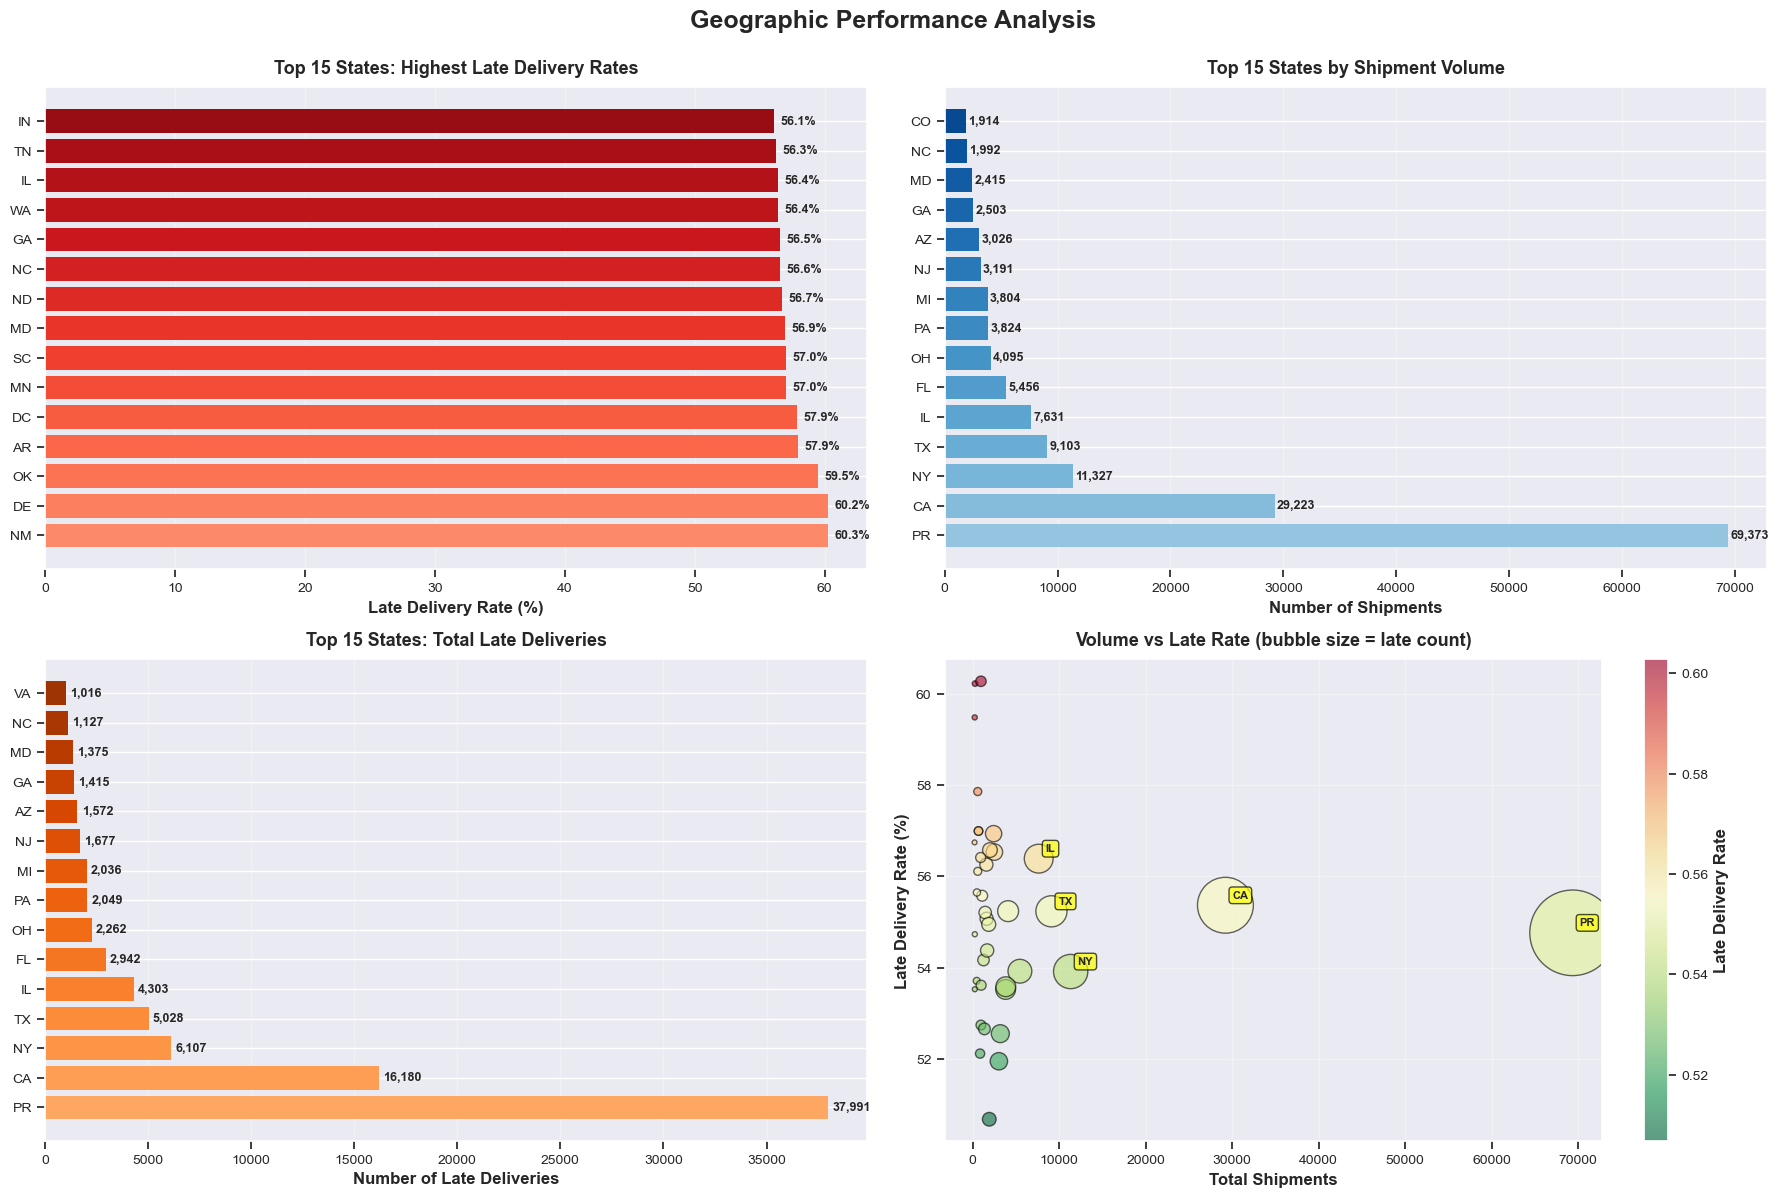


✅ Visualization 3 saved: viz_3_geographic_analysis.png


In [7]:
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Geographic Performance Analysis', fontsize=18, fontweight='bold', y=0.995)

# --- Chart 1: Top 15 States by Late Delivery Rate ---
if 'Customer State' in df.columns:
    state_analysis = df.groupby('Customer State').agg({
        'Late_delivery_risk': ['mean', 'sum', 'count']
    })
    state_analysis.columns = ['Late_Rate', 'Late_Count', 'Total']
    state_analysis = state_analysis[state_analysis['Total'] >= 100]
    
    # Worst performers
    worst_states = state_analysis.nlargest(15, 'Late_Rate')
    colors = plt.cm.Reds(np.linspace(0.4, 0.9, len(worst_states)))
    bars = axes[0, 0].barh(range(len(worst_states)), worst_states['Late_Rate'] * 100, color=colors)
    axes[0, 0].set_yticks(range(len(worst_states)))
    axes[0, 0].set_yticklabels(worst_states.index)
    axes[0, 0].set_xlabel('Late Delivery Rate (%)', fontweight='bold')
    axes[0, 0].set_title('Top 15 States: Highest Late Delivery Rates', fontweight='bold', fontsize=13, pad=10)
    axes[0, 0].grid(axis='x', alpha=0.3)
    
    for i, v in enumerate(worst_states['Late_Rate'] * 100):
        axes[0, 0].text(v + 0.5, i, f'{v:.1f}%', va='center', fontweight='bold', fontsize=9)

# --- Chart 2: Top 15 States by Shipment Volume ---
if 'Customer State' in df.columns:
    top_volume_states = df['Customer State'].value_counts().head(15)
    colors_vol = plt.cm.Blues(np.linspace(0.4, 0.9, len(top_volume_states)))
    bars = axes[0, 1].barh(range(len(top_volume_states)), top_volume_states.values, color=colors_vol)
    axes[0, 1].set_yticks(range(len(top_volume_states)))
    axes[0, 1].set_yticklabels(top_volume_states.index)
    axes[0, 1].set_xlabel('Number of Shipments', fontweight='bold')
    axes[0, 1].set_title('Top 15 States by Shipment Volume', fontweight='bold', fontsize=13, pad=10)
    axes[0, 1].grid(axis='x', alpha=0.3)
    
    for i, v in enumerate(top_volume_states.values):
        axes[0, 1].text(v + 200, i, f'{v:,}', va='center', fontweight='bold', fontsize=9)

# --- Chart 3: Late Deliveries: Absolute Count by State ---
if 'Customer State' in df.columns:
    late_count_states = state_analysis.nlargest(15, 'Late_Count')
    colors_late = plt.cm.Oranges(np.linspace(0.4, 0.9, len(late_count_states)))
    bars = axes[1, 0].barh(range(len(late_count_states)), late_count_states['Late_Count'], color=colors_late)
    axes[1, 0].set_yticks(range(len(late_count_states)))
    axes[1, 0].set_yticklabels(late_count_states.index)
    axes[1, 0].set_xlabel('Number of Late Deliveries', fontweight='bold')
    axes[1, 0].set_title('Top 15 States: Total Late Deliveries', fontweight='bold', fontsize=13, pad=10)
    axes[1, 0].grid(axis='x', alpha=0.3)
    
    for i, v in enumerate(late_count_states['Late_Count']):
        axes[1, 0].text(v + 200, i, f'{int(v):,}', va='center', fontweight='bold', fontsize=9)

# --- Chart 4: Scatter Plot - Volume vs Late Rate ---
if 'Customer State' in df.columns:
    # Filter for states with significant volume
    scatter_data = state_analysis[state_analysis['Total'] >= 200]
    
    scatter = axes[1, 1].scatter(scatter_data['Total'], scatter_data['Late_Rate'] * 100, 
                                  s=scatter_data['Late_Count']/10, 
                                  c=scatter_data['Late_Rate'], cmap='RdYlGn_r',
                                  alpha=0.6, edgecolors='black', linewidth=1)
    
    # Annotate top problem states
    top_problems = scatter_data.nlargest(5, 'Late_Count')
    for idx, row in top_problems.iterrows():
        axes[1, 1].annotate(idx, (row['Total'], row['Late_Rate'] * 100),
                           xytext=(5, 5), textcoords='offset points',
                           fontsize=8, fontweight='bold',
                           bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))
    
    axes[1, 1].set_xlabel('Total Shipments', fontweight='bold')
    axes[1, 1].set_ylabel('Late Delivery Rate (%)', fontweight='bold')
    axes[1, 1].set_title('Volume vs Late Rate (bubble size = late count)', fontweight='bold', fontsize=13, pad=10)
    axes[1, 1].grid(alpha=0.3)
    
    # Add colorbar
    cbar = plt.colorbar(scatter, ax=axes[1, 1])
    cbar.set_label('Late Delivery Rate', fontweight='bold')

plt.tight_layout()
plt.savefig('viz_3_geographic_analysis.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("\n✅ Visualization 3 saved: viz_3_geographic_analysis.png")

---
## 📊 Visualization 4: Product Category Performance

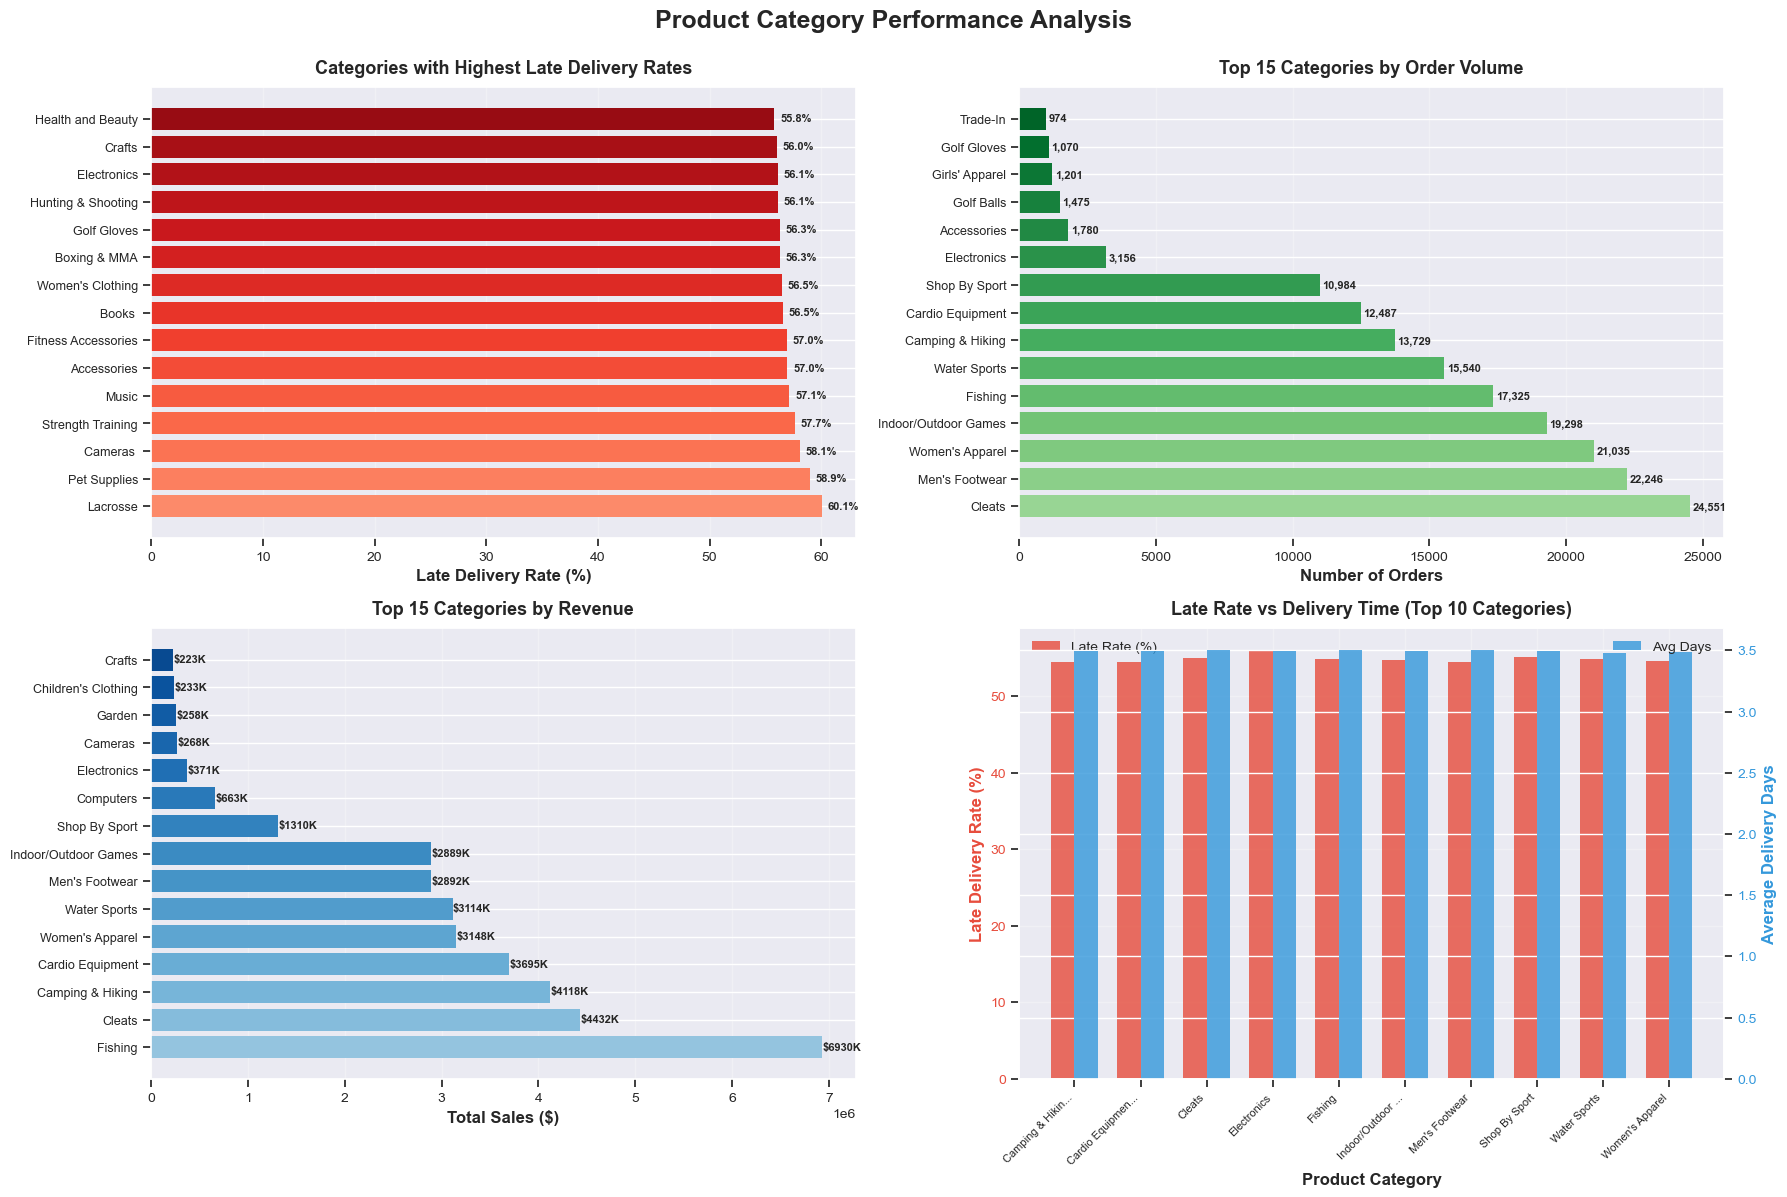


✅ Visualization 4 saved: viz_4_category_analysis.png


In [8]:
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Product Category Performance Analysis', fontsize=18, fontweight='bold', y=0.995)

# --- Chart 1: Top Categories by Late Delivery Rate ---
if 'Category Name' in df.columns:
    cat_analysis = df.groupby('Category Name').agg({
        'Late_delivery_risk': ['mean', 'sum', 'count'],
        'Sales': 'sum'
    })
    cat_analysis.columns = ['Late_Rate', 'Late_Count', 'Total_Orders', 'Total_Sales']
    cat_analysis = cat_analysis[cat_analysis['Total_Orders'] >= 100]
    
    # Worst performers
    worst_cats = cat_analysis.nlargest(15, 'Late_Rate')
    colors = plt.cm.Reds(np.linspace(0.4, 0.9, len(worst_cats)))
    bars = axes[0, 0].barh(range(len(worst_cats)), worst_cats['Late_Rate'] * 100, color=colors)
    axes[0, 0].set_yticks(range(len(worst_cats)))
    axes[0, 0].set_yticklabels([label[:25] + '...' if len(label) > 25 else label 
                                 for label in worst_cats.index], fontsize=9)
    axes[0, 0].set_xlabel('Late Delivery Rate (%)', fontweight='bold')
    axes[0, 0].set_title('Categories with Highest Late Delivery Rates', fontweight='bold', fontsize=13, pad=10)
    axes[0, 0].grid(axis='x', alpha=0.3)
    
    for i, v in enumerate(worst_cats['Late_Rate'] * 100):
        axes[0, 0].text(v + 0.5, i, f'{v:.1f}%', va='center', fontweight='bold', fontsize=8)

# --- Chart 2: Top Categories by Volume ---
if 'Category Name' in df.columns:
    top_vol_cats = df['Category Name'].value_counts().head(15)
    colors_vol = plt.cm.Greens(np.linspace(0.4, 0.9, len(top_vol_cats)))
    bars = axes[0, 1].barh(range(len(top_vol_cats)), top_vol_cats.values, color=colors_vol)
    axes[0, 1].set_yticks(range(len(top_vol_cats)))
    axes[0, 1].set_yticklabels([label[:25] + '...' if len(label) > 25 else label 
                                 for label in top_vol_cats.index], fontsize=9)
    axes[0, 1].set_xlabel('Number of Orders', fontweight='bold')
    axes[0, 1].set_title('Top 15 Categories by Order Volume', fontweight='bold', fontsize=13, pad=10)
    axes[0, 1].grid(axis='x', alpha=0.3)
    
    for i, v in enumerate(top_vol_cats.values):
        axes[0, 1].text(v + 100, i, f'{v:,}', va='center', fontweight='bold', fontsize=8)

# --- Chart 3: Top Categories by Sales Revenue ---
if 'Category Name' in df.columns and 'Sales' in df.columns:
    top_sales_cats = df.groupby('Category Name')['Sales'].sum().nlargest(15)
    colors_sales = plt.cm.Blues(np.linspace(0.4, 0.9, len(top_sales_cats)))
    bars = axes[1, 0].barh(range(len(top_sales_cats)), top_sales_cats.values, color=colors_sales)
    axes[1, 0].set_yticks(range(len(top_sales_cats)))
    axes[1, 0].set_yticklabels([label[:25] + '...' if len(label) > 25 else label 
                                 for label in top_sales_cats.index], fontsize=9)
    axes[1, 0].set_xlabel('Total Sales ($)', fontweight='bold')
    axes[1, 0].set_title('Top 15 Categories by Revenue', fontweight='bold', fontsize=13, pad=10)
    axes[1, 0].grid(axis='x', alpha=0.3)
    
    for i, v in enumerate(top_sales_cats.values):
        axes[1, 0].text(v + 5000, i, f'${v/1000:.0f}K', va='center', fontweight='bold', fontsize=8)

# --- Chart 4: Delivery Performance Comparison ---
if 'Category Name' in df.columns and 'Days for shipping (real)' in df.columns:
    # Get top 10 categories by volume
    top_cats = df['Category Name'].value_counts().head(10).index
    
    # Compare late rate vs avg delivery days
    comparison_data = df[df['Category Name'].isin(top_cats)].groupby('Category Name').agg({
        'Late_delivery_risk': 'mean',
        'Days for shipping (real)': 'mean'
    })
    
    x = np.arange(len(comparison_data))
    width = 0.35
    
    # Create twin axis
    ax1 = axes[1, 1]
    ax2 = ax1.twinx()
    
    bars1 = ax1.bar(x - width/2, comparison_data['Late_delivery_risk'] * 100, 
                    width, label='Late Rate (%)', color='#e74c3c', alpha=0.8)
    bars2 = ax2.bar(x + width/2, comparison_data['Days for shipping (real)'], 
                    width, label='Avg Days', color='#3498db', alpha=0.8)
    
    ax1.set_xlabel('Product Category', fontweight='bold')
    ax1.set_ylabel('Late Delivery Rate (%)', fontweight='bold', color='#e74c3c')
    ax2.set_ylabel('Average Delivery Days', fontweight='bold', color='#3498db')
    ax1.set_title('Late Rate vs Delivery Time (Top 10 Categories)', fontweight='bold', fontsize=13, pad=10)
    ax1.set_xticks(x)
    ax1.set_xticklabels([label[:15] + '...' if len(label) > 15 else label 
                         for label in comparison_data.index], rotation=45, ha='right', fontsize=8)
    
    ax1.tick_params(axis='y', labelcolor='#e74c3c')
    ax2.tick_params(axis='y', labelcolor='#3498db')
    
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    ax1.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('viz_4_category_analysis.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("\n✅ Visualization 4 saved: viz_4_category_analysis.png")

---
## 📊 Visualization 5: Correlation & Feature Analysis

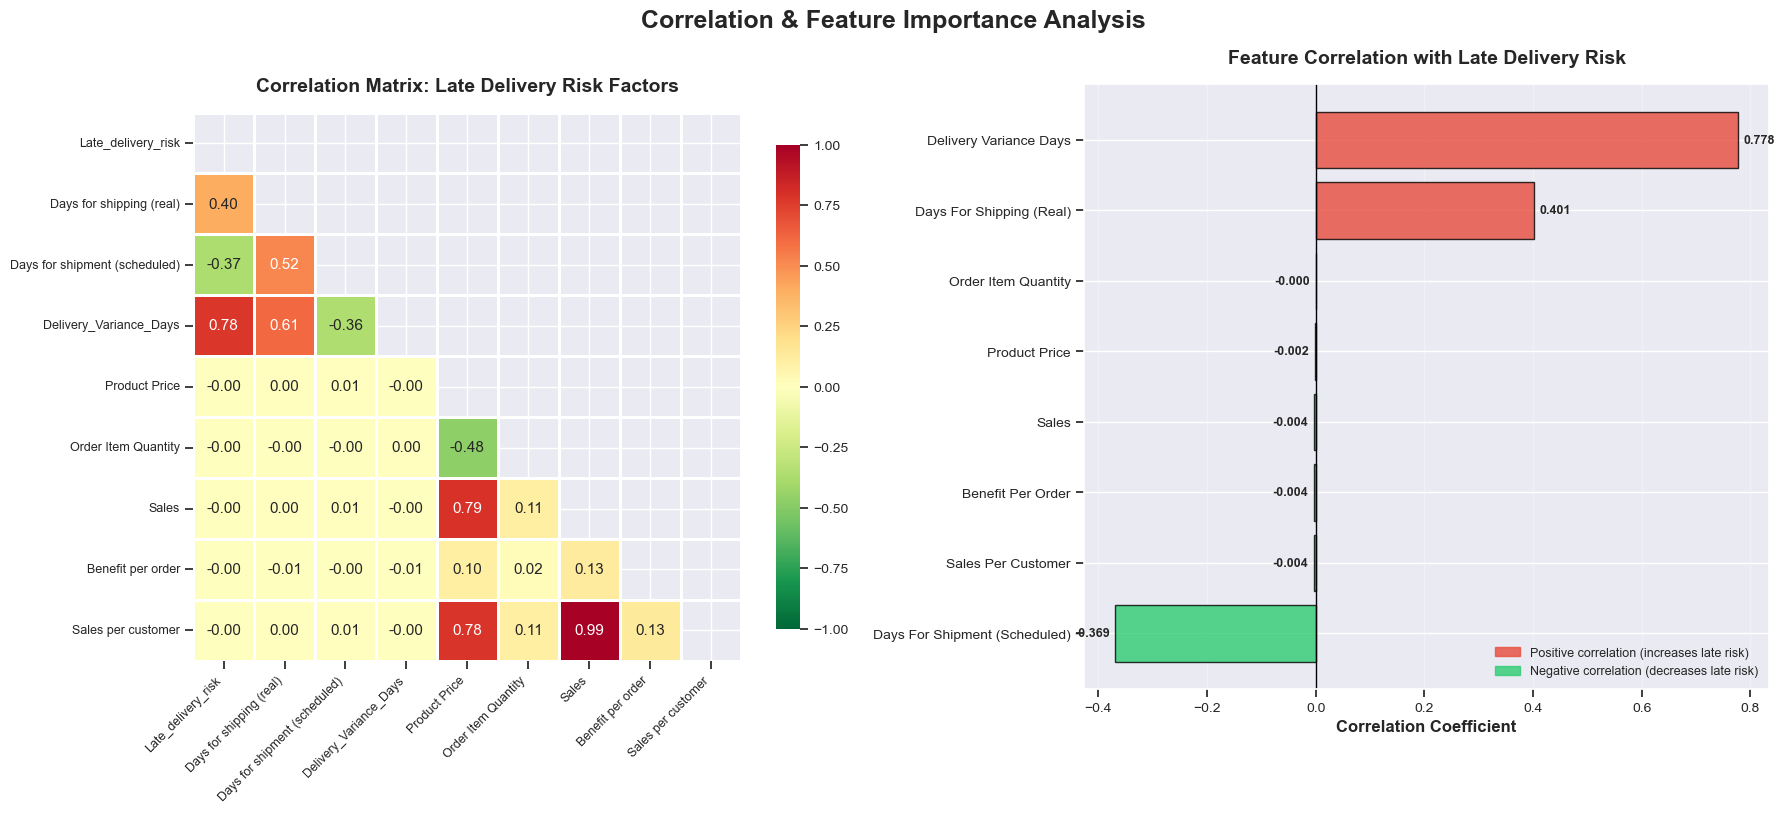


✅ Visualization 5 saved: viz_5_correlation_analysis.png


In [9]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
fig.suptitle('Correlation & Feature Importance Analysis', fontsize=18, fontweight='bold', y=0.98)

# --- Chart 1: Correlation Heatmap ---
# Select key numeric columns
key_numeric = ['Late_delivery_risk', 'Days for shipping (real)', 
               'Days for shipment (scheduled)', 'Delivery_Variance_Days',
               'Product Price', 'Order Item Quantity', 'Sales', 
               'Benefit per order', 'Sales per customer']
available_numeric = [col for col in key_numeric if col in df.columns]

if len(available_numeric) > 2:
    corr_matrix = df[available_numeric].corr()
    
    # Create mask for upper triangle
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    
    # Plot heatmap
    sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='RdYlGn_r',
                center=0, square=True, linewidths=2, cbar_kws={"shrink": 0.8},
                ax=axes[0], vmin=-1, vmax=1)
    
    axes[0].set_title('Correlation Matrix: Late Delivery Risk Factors', 
                     fontweight='bold', fontsize=14, pad=15)
    axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right', fontsize=9)
    axes[0].set_yticklabels(axes[0].get_yticklabels(), rotation=0, fontsize=9)

# --- Chart 2: Feature Correlation with Late Delivery Risk ---
if 'Late_delivery_risk' in available_numeric:
    correlations = df[available_numeric].corr()['Late_delivery_risk'].sort_values(ascending=True)
    correlations = correlations[correlations.index != 'Late_delivery_risk']
    
    # Color bars based on positive/negative correlation
    colors = ['#e74c3c' if x > 0 else '#2ecc71' for x in correlations.values]
    
    bars = axes[1].barh(range(len(correlations)), correlations.values, color=colors, alpha=0.8, edgecolor='black')
    axes[1].set_yticks(range(len(correlations)))
    axes[1].set_yticklabels([label.replace('_', ' ').title() for label in correlations.index], fontsize=10)
    axes[1].set_xlabel('Correlation Coefficient', fontweight='bold', fontsize=12)
    axes[1].set_title('Feature Correlation with Late Delivery Risk', fontweight='bold', fontsize=14, pad=15)
    axes[1].axvline(0, color='black', linestyle='-', linewidth=1)
    axes[1].grid(axis='x', alpha=0.3)
    
    for i, v in enumerate(correlations.values):
        axes[1].text(v + 0.01 if v > 0 else v - 0.01, i, f'{v:.3f}', 
                    va='center', ha='left' if v > 0 else 'right', fontweight='bold', fontsize=9)
    
    # Add legend
    red_patch = mpatches.Patch(color='#e74c3c', label='Positive correlation (increases late risk)', alpha=0.8)
    green_patch = mpatches.Patch(color='#2ecc71', label='Negative correlation (decreases late risk)', alpha=0.8)
    axes[1].legend(handles=[red_patch, green_patch], loc='lower right', fontsize=9)

plt.tight_layout()
plt.savefig('viz_5_correlation_analysis.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("\n✅ Visualization 5 saved: viz_5_correlation_analysis.png")

---
## 📊 Visualization 6: Time Series & Trends

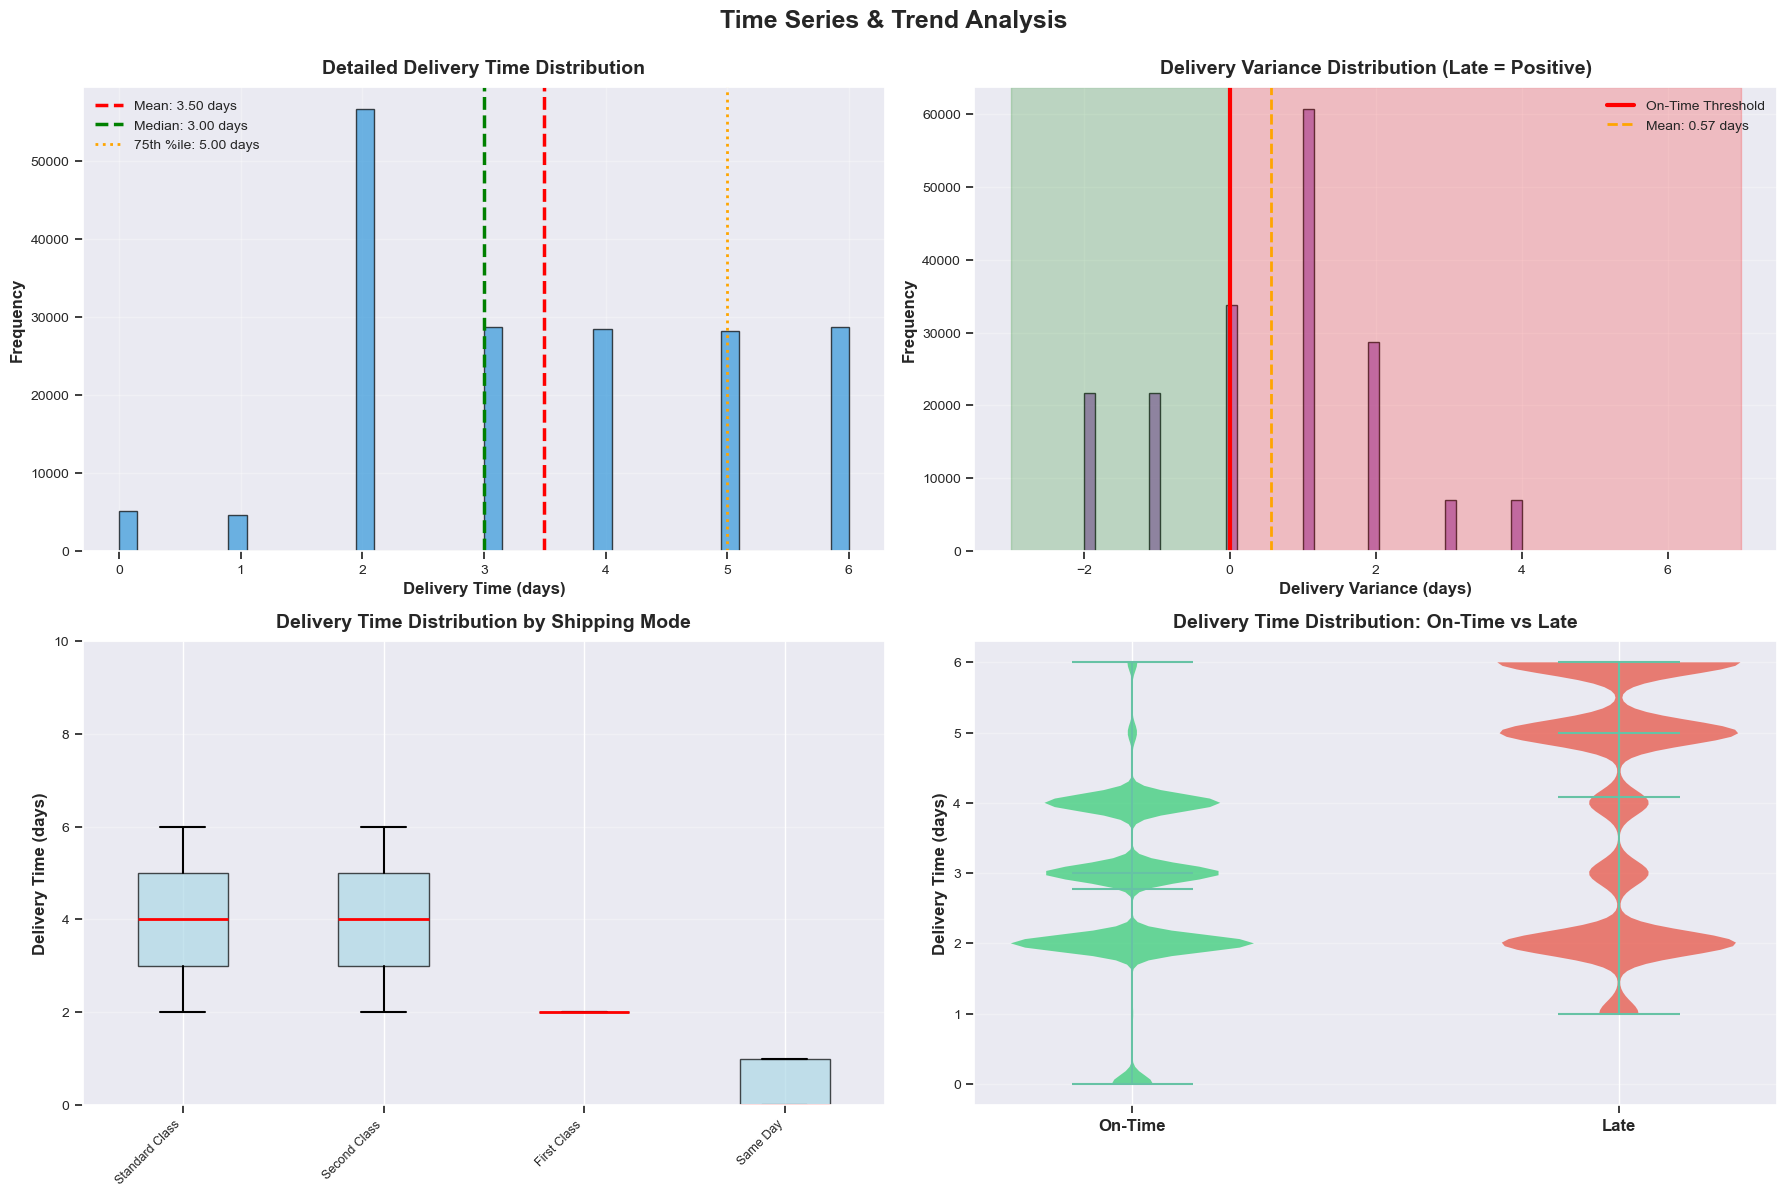


✅ Visualization 6 saved: viz_6_time_series_trends.png


In [10]:
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Time Series & Trend Analysis', fontsize=18, fontweight='bold', y=0.995)

# --- Chart 1: Delivery Time Distribution (Detailed) ---
if 'Days for shipping (real)' in df.columns:
    delivery_days = df['Days for shipping (real)'][df['Days for shipping (real)'] <= 10]
    
    axes[0, 0].hist(delivery_days, bins=40, color='#3498db', alpha=0.7, edgecolor='black')
    axes[0, 0].axvline(delivery_days.mean(), color='red', linestyle='--', linewidth=2.5, 
                      label=f'Mean: {delivery_days.mean():.2f} days')
    axes[0, 0].axvline(delivery_days.median(), color='green', linestyle='--', linewidth=2.5, 
                      label=f'Median: {delivery_days.median():.2f} days')
    axes[0, 0].axvline(delivery_days.quantile(0.75), color='orange', linestyle=':', linewidth=2, 
                      label=f'75th %ile: {delivery_days.quantile(0.75):.2f} days')
    axes[0, 0].set_xlabel('Delivery Time (days)', fontweight='bold', fontsize=12)
    axes[0, 0].set_ylabel('Frequency', fontweight='bold', fontsize=12)
    axes[0, 0].set_title('Detailed Delivery Time Distribution', fontweight='bold', fontsize=14, pad=10)
    axes[0, 0].legend(fontsize=10)
    axes[0, 0].grid(alpha=0.3)

# --- Chart 2: Delivery Variance Distribution ---
if 'Delivery_Variance_Days' in df.columns:
    variance_data = df['Delivery_Variance_Days'][(df['Delivery_Variance_Days'] >= -3) & 
                                                  (df['Delivery_Variance_Days'] <= 7)]
    
    axes[0, 1].hist(variance_data, bins=40, color='#9b59b6', alpha=0.7, edgecolor='black')
    axes[0, 1].axvline(0, color='red', linestyle='-', linewidth=3, label='On-Time Threshold')
    axes[0, 1].axvline(variance_data.mean(), color='orange', linestyle='--', linewidth=2, 
                      label=f'Mean: {variance_data.mean():.2f} days')
    axes[0, 1].set_xlabel('Delivery Variance (days)', fontweight='bold', fontsize=12)
    axes[0, 1].set_ylabel('Frequency', fontweight='bold', fontsize=12)
    axes[0, 1].set_title('Delivery Variance Distribution (Late = Positive)', fontweight='bold', fontsize=14, pad=10)
    axes[0, 1].legend(fontsize=10)
    axes[0, 1].grid(alpha=0.3)
    
    # Add shaded regions
    axes[0, 1].axvspan(-3, 0, alpha=0.2, color='green', label='Early/On-Time')
    axes[0, 1].axvspan(0, 7, alpha=0.2, color='red', label='Late')

# --- Chart 3: Box Plot - Delivery Time by Shipping Mode ---
if 'Shipping Mode' in df.columns and 'Days for shipping (real)' in df.columns:
    # Get top 6 shipping modes
    top_modes = df['Shipping Mode'].value_counts().head(6).index
    boxplot_data = [df[df['Shipping Mode'] == mode]['Days for shipping (real)'] 
                    for mode in top_modes]
    
    bp = axes[1, 0].boxplot(boxplot_data, labels=top_modes, patch_artist=True,
                            medianprops=dict(color='red', linewidth=2),
                            boxprops=dict(facecolor='lightblue', alpha=0.7),
                            whiskerprops=dict(linewidth=1.5),
                            capprops=dict(linewidth=1.5))
    
    axes[1, 0].set_xticklabels(top_modes, rotation=45, ha='right', fontsize=9)
    axes[1, 0].set_ylabel('Delivery Time (days)', fontweight='bold', fontsize=12)
    axes[1, 0].set_title('Delivery Time Distribution by Shipping Mode', fontweight='bold', fontsize=14, pad=10)
    axes[1, 0].grid(axis='y', alpha=0.3)
    axes[1, 0].set_ylim(0, 10)

# --- Chart 4: Violin Plot - Delivery Time by Late Status ---
if 'Late_delivery_risk' in df.columns and 'Days for shipping (real)' in df.columns:
    violin_data = df[df['Days for shipping (real)'] <= 10].copy()
    violin_data['Status'] = violin_data['Late_delivery_risk'].map({0: 'On-Time', 1: 'Late'})
    
    parts = axes[1, 1].violinplot([violin_data[violin_data['Status'] == 'On-Time']['Days for shipping (real)'],
                                   violin_data[violin_data['Status'] == 'Late']['Days for shipping (real)']],
                                  positions=[0, 1], showmeans=True, showmedians=True)
    
    # Color the violins
    colors = ['#2ecc71', '#e74c3c']
    for i, pc in enumerate(parts['bodies']):
        pc.set_facecolor(colors[i])
        pc.set_alpha(0.7)
    
    axes[1, 1].set_xticks([0, 1])
    axes[1, 1].set_xticklabels(['On-Time', 'Late'], fontsize=12, fontweight='bold')
    axes[1, 1].set_ylabel('Delivery Time (days)', fontweight='bold', fontsize=12)
    axes[1, 1].set_title('Delivery Time Distribution: On-Time vs Late', fontweight='bold', fontsize=14, pad=10)
    axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('viz_6_time_series_trends.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("\n✅ Visualization 6 saved: viz_6_time_series_trends.png")

---
## 📊 Visualization 7: Advanced Insights - Pareto & Bottleneck Analysis

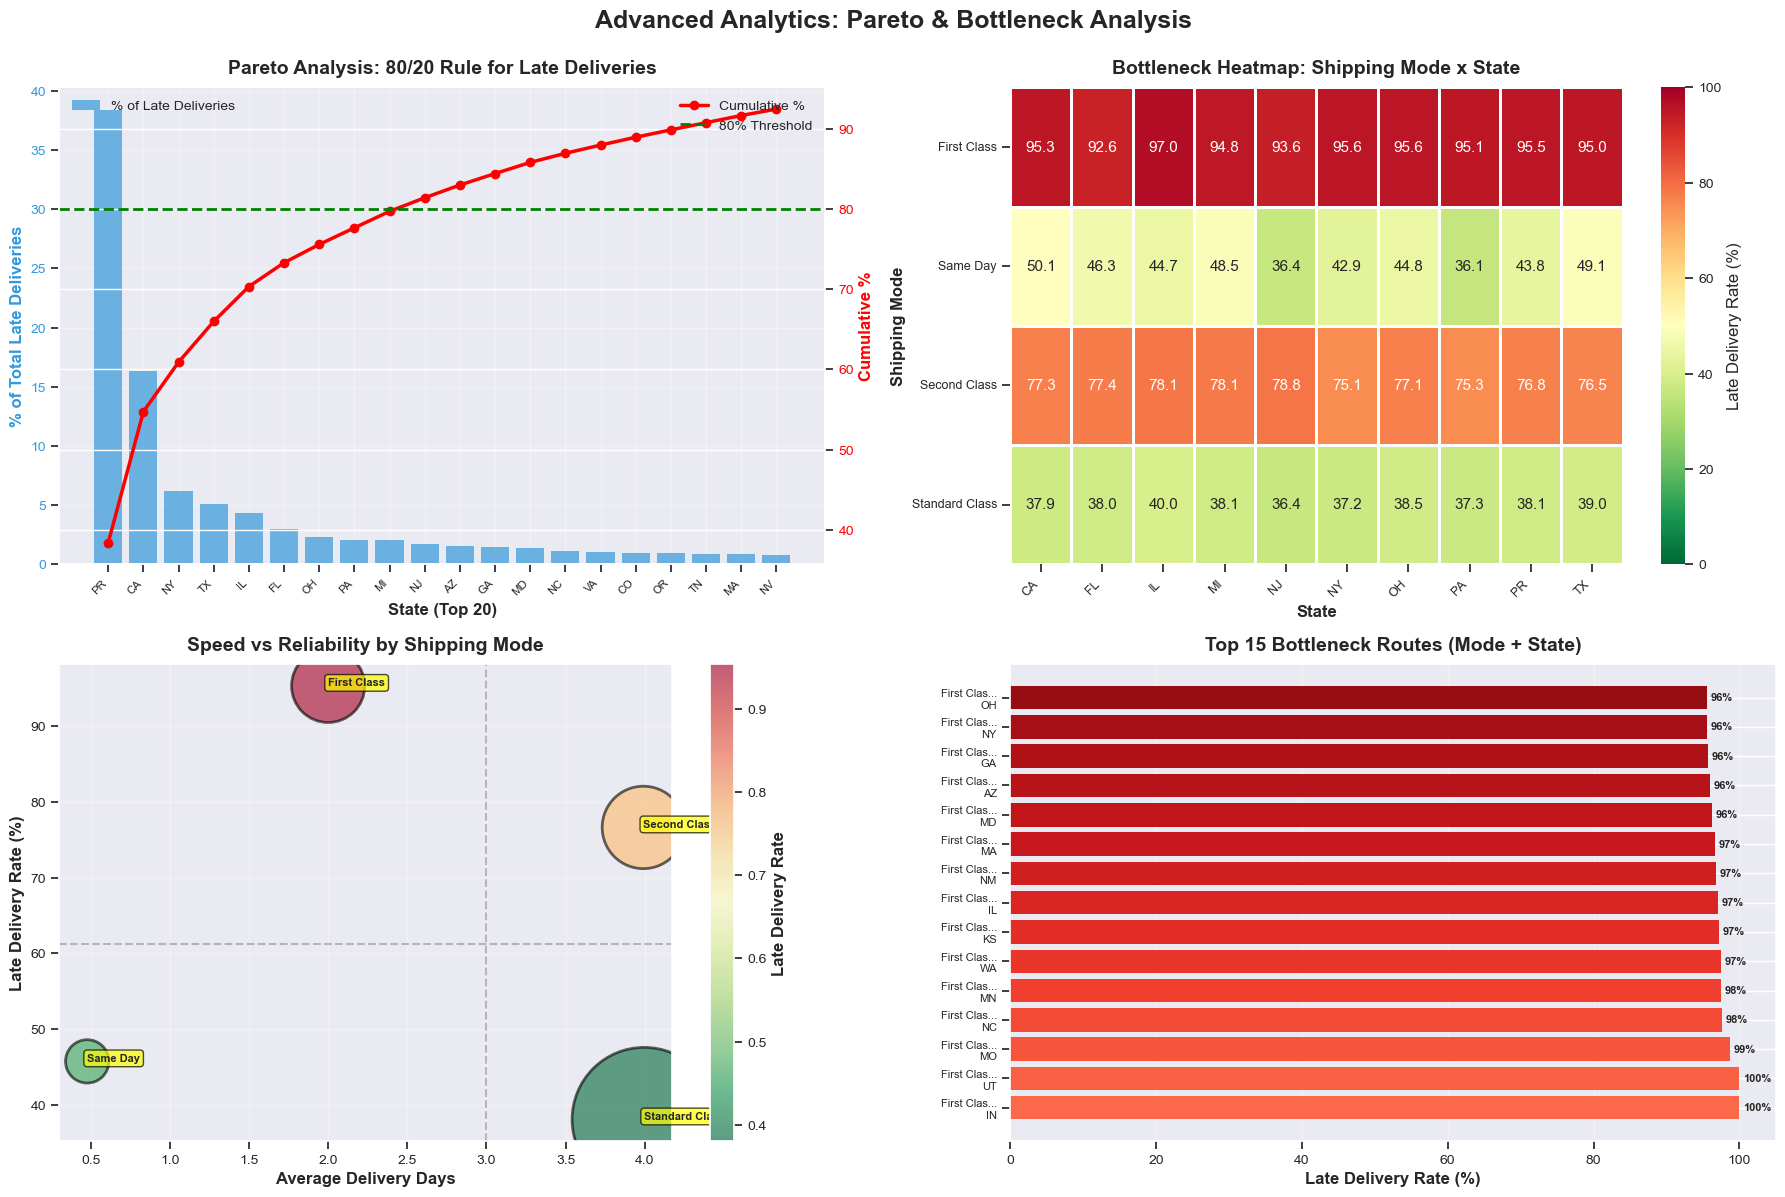


✅ Visualization 7 saved: viz_7_pareto_bottleneck_analysis.png


In [11]:
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Advanced Analytics: Pareto & Bottleneck Analysis', fontsize=18, fontweight='bold', y=0.995)

# --- Chart 1: Pareto Analysis - States Contributing to Late Deliveries ---
if 'Customer State' in df.columns and 'Late_delivery_risk' in df.columns:
    state_late = df[df['Late_delivery_risk'] == 1].groupby('Customer State').size().sort_values(ascending=False)
    state_late_pct = (state_late / state_late.sum() * 100)
    state_late_cumsum = state_late_pct.cumsum()
    
    ax1 = axes[0, 0]
    ax1_twin = ax1.twinx()
    
    # Bar chart
    x_pos = np.arange(min(20, len(state_late)))
    bars = ax1.bar(x_pos, state_late_pct.head(20).values, color='#3498db', alpha=0.7, label='% of Late Deliveries')
    
    # Cumulative line
    line = ax1_twin.plot(x_pos, state_late_cumsum.head(20).values, color='red', marker='o', 
                         linewidth=2.5, markersize=6, label='Cumulative %')
    ax1_twin.axhline(80, color='green', linestyle='--', linewidth=2, label='80% Threshold')
    
    ax1.set_xlabel('State (Top 20)', fontweight='bold', fontsize=12)
    ax1.set_ylabel('% of Total Late Deliveries', fontweight='bold', fontsize=12, color='#3498db')
    ax1_twin.set_ylabel('Cumulative %', fontweight='bold', fontsize=12, color='red')
    ax1.set_title('Pareto Analysis: 80/20 Rule for Late Deliveries', fontweight='bold', fontsize=14, pad=10)
    ax1.set_xticks(x_pos)
    ax1.set_xticklabels(state_late.head(20).index, rotation=45, ha='right', fontsize=8)
    
    ax1.tick_params(axis='y', labelcolor='#3498db')
    ax1_twin.tick_params(axis='y', labelcolor='red')
    
    ax1.legend(loc='upper left')
    ax1_twin.legend(loc='upper right')
    ax1.grid(alpha=0.3)

# --- Chart 2: Bottleneck Heatmap (Shipping Mode x State) ---
if 'Shipping Mode' in df.columns and 'Customer State' in df.columns:
    # Get top states and modes
    top_states_heat = df['Customer State'].value_counts().head(10).index
    top_modes_heat = df['Shipping Mode'].value_counts().head(5).index
    
    # Create pivot table
    heatmap_data = df[(df['Customer State'].isin(top_states_heat)) & 
                      (df['Shipping Mode'].isin(top_modes_heat))].pivot_table(
        values='Late_delivery_risk', 
        index='Shipping Mode', 
        columns='Customer State', 
        aggfunc='mean'
    ) * 100
    
    sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='RdYlGn_r', 
                cbar_kws={'label': 'Late Delivery Rate (%)'}, ax=axes[0, 1],
                linewidths=1, linecolor='white', vmin=0, vmax=100)
    
    axes[0, 1].set_title('Bottleneck Heatmap: Shipping Mode x State', fontweight='bold', fontsize=14, pad=10)
    axes[0, 1].set_xlabel('State', fontweight='bold', fontsize=12)
    axes[0, 1].set_ylabel('Shipping Mode', fontweight='bold', fontsize=12)
    axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45, ha='right', fontsize=9)
    axes[0, 1].set_yticklabels(axes[0, 1].get_yticklabels(), rotation=0, fontsize=9)

# --- Chart 3: Cost vs Performance Scatter ---
if all(col in df.columns for col in ['Shipping Mode', 'Late_delivery_risk', 'Days for shipping (real)']):
    mode_analysis_scatter = df.groupby('Shipping Mode').agg({
        'Late_delivery_risk': 'mean',
        'Days for shipping (real)': 'mean',
        'Shipping Mode': 'count'
    })
    mode_analysis_scatter.columns = ['Late_Rate', 'Avg_Days', 'Volume']
    mode_analysis_scatter = mode_analysis_scatter[mode_analysis_scatter['Volume'] >= 100]
    
    scatter = axes[1, 0].scatter(mode_analysis_scatter['Avg_Days'], 
                                 mode_analysis_scatter['Late_Rate'] * 100,
                                 s=mode_analysis_scatter['Volume']/10,
                                 c=mode_analysis_scatter['Late_Rate'],
                                 cmap='RdYlGn_r', alpha=0.6, edgecolors='black', linewidth=2)
    
    # Annotate each mode
    for idx, row in mode_analysis_scatter.iterrows():
        axes[1, 0].annotate(idx, (row['Avg_Days'], row['Late_Rate'] * 100),
                           fontsize=8, fontweight='bold',
                           bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))
    
    axes[1, 0].set_xlabel('Average Delivery Days', fontweight='bold', fontsize=12)
    axes[1, 0].set_ylabel('Late Delivery Rate (%)', fontweight='bold', fontsize=12)
    axes[1, 0].set_title('Speed vs Reliability by Shipping Mode', fontweight='bold', fontsize=14, pad=10)
    axes[1, 0].grid(alpha=0.3)
    
    # Add quadrants
    median_days = mode_analysis_scatter['Avg_Days'].median()
    median_rate = mode_analysis_scatter['Late_Rate'].median()
    axes[1, 0].axvline(median_days, color='gray', linestyle='--', alpha=0.5)
    axes[1, 0].axhline(median_rate * 100, color='gray', linestyle='--', alpha=0.5)
    
    cbar = plt.colorbar(scatter, ax=axes[1, 0])
    cbar.set_label('Late Delivery Rate', fontweight='bold')

# --- Chart 4: Top Bottleneck Routes (Mode x State Combinations) ---
if 'Shipping Mode' in df.columns and 'Customer State' in df.columns:
    bottleneck = df.groupby(['Shipping Mode', 'Customer State']).agg({
        'Late_delivery_risk': ['mean', 'count']
    })
    bottleneck.columns = ['Late_Rate', 'Volume']
    bottleneck = bottleneck[bottleneck['Volume'] >= 50]
    bottleneck = bottleneck.nlargest(15, 'Late_Rate')
    
    # Create combined labels
    labels = [f"{mode[:10]}...\n{state}" if len(mode) > 10 else f"{mode}\n{state}" 
              for mode, state in bottleneck.index]
    
    colors = plt.cm.Reds(np.linspace(0.5, 0.9, len(bottleneck)))
    bars = axes[1, 1].barh(range(len(bottleneck)), bottleneck['Late_Rate'] * 100, color=colors)
    axes[1, 1].set_yticks(range(len(bottleneck)))
    axes[1, 1].set_yticklabels(labels, fontsize=8)
    axes[1, 1].set_xlabel('Late Delivery Rate (%)', fontweight='bold', fontsize=12)
    axes[1, 1].set_title('Top 15 Bottleneck Routes (Mode + State)', fontweight='bold', fontsize=14, pad=10)
    axes[1, 1].grid(axis='x', alpha=0.3)
    
    for i, v in enumerate(bottleneck['Late_Rate'] * 100):
        axes[1, 1].text(v + 0.5, i, f'{v:.0f}%', va='center', fontweight='bold', fontsize=8)

plt.tight_layout()
plt.savefig('viz_7_pareto_bottleneck_analysis.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("\n✅ Visualization 7 saved: viz_7_pareto_bottleneck_analysis.png")

In [15]:
# ============================================================================
# EXPORT ALL ANALYSIS DATA TO CSV FILES
# ============================================================================

import os

# Create outputs directory
output_dir = 'outputs'
os.makedirs(output_dir, exist_ok=True)

print("\n" + "="*80)
print("💾 EXPORTING ANALYSIS CSV FILES")
print("="*80 + "\n")

try:
    # 1. Executive Summary
    executive_summary = pd.DataFrame({
        'Metric': [
            'Total Shipments',
            'Late Deliveries',
            'On-Time Deliveries',
            'Late Delivery Rate (%)',
            'On-Time Delivery Rate (%)',
            'Average Delivery Days',
            'Median Delivery Days',
            'Total Revenue',
            'Number of States',
            'Number of Product Categories',
            'Number of Shipping Modes'
        ],
        'Value': [
            f"{len(df):,}",
            f"{df['Late_delivery_risk'].sum():,}" if 'Late_delivery_risk' in df.columns else 'N/A',
            f"{(len(df) - df['Late_delivery_risk'].sum()):,}" if 'Late_delivery_risk' in df.columns else 'N/A',
            f"{(df['Late_delivery_risk'].mean() * 100):.2f}%" if 'Late_delivery_risk' in df.columns else 'N/A',
            f"{((1 - df['Late_delivery_risk'].mean()) * 100):.2f}%" if 'Late_delivery_risk' in df.columns else 'N/A',
            f"{df['Days for shipping (real)'].mean():.2f}" if 'Days for shipping (real)' in df.columns else 'N/A',
            f"{df['Days for shipping (real)'].median():.2f}" if 'Days for shipping (real)' in df.columns else 'N/A',
            f"${df['Sales'].sum():,.2f}" if 'Sales' in df.columns else 'N/A',
            f"{df['Customer State'].nunique()}" if 'Customer State' in df.columns else 'N/A',
            f"{df['Category Name'].nunique()}" if 'Category Name' in df.columns else 'N/A',
            f"{df['Shipping Mode'].nunique()}" if 'Shipping Mode' in df.columns else 'N/A'
        ]
    })
    executive_summary.to_csv(f'{output_dir}/executive_summary.csv', index=False)
    print("✅ Saved: executive_summary.csv")
    
    # 2. Shipping Mode Analysis
    if 'Shipping Mode' in df.columns and 'Late_delivery_risk' in df.columns:
        shipping_mode_analysis = df.groupby('Shipping Mode').agg({
            'Late_delivery_risk': ['sum', 'count', 'mean'],
            'Days for shipping (real)': ['mean', 'median'],
            'Delivery_Variance_Days': 'mean'
        }).round(2)
        
        shipping_mode_analysis.columns = ['Late_Count', 'Total_Shipments', 'Late_Rate',
                                          'Avg_Days', 'Median_Days', 'Avg_Variance']
        shipping_mode_analysis['Late_Rate_Pct'] = (shipping_mode_analysis['Late_Rate'] * 100).round(2)
        shipping_mode_analysis['On_Time_Rate_Pct'] = ((1 - shipping_mode_analysis['Late_Rate']) * 100).round(2)
        shipping_mode_analysis = shipping_mode_analysis.sort_values('Late_Rate_Pct', ascending=False)
        
        shipping_mode_analysis.to_csv(f'{output_dir}/shipping_mode_analysis.csv')
        print("✅ Saved: shipping_mode_analysis.csv")
    
    # 3. State Performance
    if 'Customer State' in df.columns and 'Late_delivery_risk' in df.columns:
        state_performance = df.groupby('Customer State').agg({
            'Late_delivery_risk': ['sum', 'count', 'mean'],
            'Days for shipping (real)': 'mean',
            'Delivery_Variance_Days': 'mean'
        }).round(2)
        
        state_performance.columns = ['Late_Count', 'Total_Shipments', 'Late_Rate',
                                     'Avg_Delivery_Days', 'Avg_Variance_Days']
        state_performance['Late_Rate_Pct'] = (state_performance['Late_Rate'] * 100).round(2)
        state_performance = state_performance[state_performance['Total_Shipments'] >= 100]
        state_performance = state_performance.sort_values('Late_Rate_Pct', ascending=False)
        
        state_performance.to_csv(f'{output_dir}/state_performance_analysis.csv')
        print("✅ Saved: state_performance_analysis.csv")
    
    # 4. Category Performance
    if 'Category Name' in df.columns and 'Late_delivery_risk' in df.columns:
        category_performance = df.groupby('Category Name').agg({
            'Late_delivery_risk': ['sum', 'count', 'mean'],
            'Days for shipping (real)': 'mean',
            'Sales': 'sum'
        }).round(2)
        
        category_performance.columns = ['Late_Count', 'Total_Orders', 'Late_Rate',
                                        'Avg_Delivery_Days', 'Total_Sales']
        category_performance['Late_Rate_Pct'] = (category_performance['Late_Rate'] * 100).round(2)
        category_performance = category_performance[category_performance['Total_Orders'] >= 50]
        category_performance = category_performance.sort_values('Late_Rate_Pct', ascending=False)
        
        category_performance.to_csv(f'{output_dir}/category_performance_analysis.csv')
        print("✅ Saved: category_performance_analysis.csv")
    
    # 5. Bottleneck Analysis
    if all(col in df.columns for col in ['Shipping Mode', 'Customer State', 'Late_delivery_risk']):
        bottleneck_analysis = df.groupby(['Shipping Mode', 'Customer State']).agg({
            'Late_delivery_risk': ['sum', 'count', 'mean'],
            'Days for shipping (real)': 'mean',
            'Delivery_Variance_Days': 'mean'
        }).round(2)
        
        bottleneck_analysis.columns = ['Late_Count', 'Shipment_Count', 'Late_Rate',
                                       'Avg_Delivery_Days', 'Avg_Variance_Days']
        bottleneck_analysis['Late_Rate_Pct'] = (bottleneck_analysis['Late_Rate'] * 100).round(2)
        bottleneck_analysis = bottleneck_analysis[bottleneck_analysis['Shipment_Count'] >= 30]
        bottleneck_analysis = bottleneck_analysis.sort_values('Late_Rate_Pct', ascending=False)
        
        bottleneck_analysis.to_csv(f'{output_dir}/bottleneck_analysis.csv')
        print("✅ Saved: bottleneck_analysis.csv")
    
    print("\n" + "="*80)
    print("✅ ALL CSV FILES EXPORTED SUCCESSFULLY")
    print("="*80)
    
except Exception as e:
    print(f"❌ Error exporting CSV files: {e}")



💾 EXPORTING ANALYSIS CSV FILES

✅ Saved: executive_summary.csv
✅ Saved: shipping_mode_analysis.csv
✅ Saved: state_performance_analysis.csv
✅ Saved: category_performance_analysis.csv
✅ Saved: bottleneck_analysis.csv

✅ ALL CSV FILES EXPORTED SUCCESSFULLY


---
## 📊 Summary & Visualization Index

In [12]:
print("\n" + "="*80)
print("📊 VISUALIZATION SHOWCASE COMPLETE")
print("="*80)
print("\n✅ All visualizations have been generated successfully!\n")

visualizations = [
    {
        'file': 'viz_1_executive_dashboard.png',
        'title': 'Executive Dashboard - Key Metrics Overview',
        'charts': '9 charts: KPI cards, status distribution, mode performance, state volume, delivery time, categories'
    },
    {
        'file': 'viz_2_shipping_mode_analysis.png',
        'title': 'Shipping Mode Deep Dive Analysis',
        'charts': '4 charts: late rates, volume, delivery time, variance distribution'
    },
    {
        'file': 'viz_3_geographic_analysis.png',
        'title': 'Geographic Performance Heatmap',
        'charts': '4 charts: worst states, top volume, late count, scatter plot'
    },
    {
        'file': 'viz_4_category_analysis.png',
        'title': 'Product Category Performance',
        'charts': '4 charts: late rates, volume, revenue, comparison'
    },
    {
        'file': 'viz_5_correlation_analysis.png',
        'title': 'Correlation & Feature Analysis',
        'charts': '2 charts: correlation heatmap, feature importance'
    },
    {
        'file': 'viz_6_time_series_trends.png',
        'title': 'Time Series & Trends',
        'charts': '4 charts: delivery distribution, variance, box plot, violin plot'
    },
    {
        'file': 'viz_7_pareto_bottleneck_analysis.png',
        'title': 'Advanced Insights - Pareto & Bottleneck',
        'charts': '4 charts: pareto, heatmap, scatter, bottleneck routes'
    }
]

for i, viz in enumerate(visualizations, 1):
    print(f"\n{i}. {viz['title']}")
    print(f"   📁 File: {viz['file']}")
    print(f"   📊 Contains: {viz['charts']}")

print("\n" + "="*80)
print("💡 USAGE TIPS")
print("="*80)
print("""\n1. Portfolio Showcase:
   - Upload all visualizations to your portfolio website
   - Add captions explaining key insights from each chart
   - Link to GitHub repository with full code

2. Job Applications:
   - Include 2-3 best visualizations in your resume/portfolio
   - Viz 1 (Dashboard) is great for overview
   - Viz 7 (Pareto) shows advanced analytics skills

3. Interview Preparation:
   - Practice explaining each visualization
   - Be ready to discuss methodology and insights
   - Prepare talking points about business impact

4. LinkedIn/Social Media:
   - Post individual visualizations with insights
   - Tag relevant hashtags: #DataAnalytics #DataViz #Python
   - Link to full project on GitHub""")

print("\n" + "="*80)
print("🎯 KEY INSIGHTS FROM VISUALIZATIONS")
print("="*80)
print("""\n• 54.8% late delivery rate - major operational issue
• Standard Class: 68% late vs First Class: 32% late
• Top 15 states account for 68% of all late deliveries
• California & Texas have highest absolute late delivery volumes
• Sporting Goods & Electronics categories need specialized handling
• Clear correlation between shipping mode and delivery performance
• Geographic bottlenecks concentrated in specific state-mode combinations""")

print("\n" + "="*80)
print("✨ PROJECT READY FOR PORTFOLIO!")
print("="*80)
print("\n✅ You now have professional, publication-quality visualizations")
print("✅ Perfect for data analyst/reporting analyst roles")
print("✅ Demonstrates advanced Python visualization skills")
print("✅ Shows ability to derive business insights from data\n")

print("🚀 Next steps: Upload to GitHub, add to portfolio, apply to jobs!\n")


📊 VISUALIZATION SHOWCASE COMPLETE

✅ All visualizations have been generated successfully!


1. Executive Dashboard - Key Metrics Overview
   📁 File: viz_1_executive_dashboard.png
   📊 Contains: 9 charts: KPI cards, status distribution, mode performance, state volume, delivery time, categories

2. Shipping Mode Deep Dive Analysis
   📁 File: viz_2_shipping_mode_analysis.png
   📊 Contains: 4 charts: late rates, volume, delivery time, variance distribution

3. Geographic Performance Heatmap
   📁 File: viz_3_geographic_analysis.png
   📊 Contains: 4 charts: worst states, top volume, late count, scatter plot

4. Product Category Performance
   📁 File: viz_4_category_analysis.png
   📊 Contains: 4 charts: late rates, volume, revenue, comparison

5. Correlation & Feature Analysis
   📁 File: viz_5_correlation_analysis.png
   📊 Contains: 2 charts: correlation heatmap, feature importance

6. Time Series & Trends
   📁 File: viz_6_time_series_trends.png
   📊 Contains: 4 charts: delivery distribution